# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        city_weather = response.json()
        city_weather
        # Parse the JSON and retrieve data
        if response.status_code == 200:
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the city information into city_data list
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })

        else:
            print(f"City not found. Skipping {city_url}...")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"Error occurred for city {city}: {e}")
        pass

    # Pause to avoid hitting API rate limits (1 second pause)
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kenai
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | jurm
Processing Record 5 of Set 1 | lazaro cardenas
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | kruisfontein
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | baiyin
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | dzhetygara
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | sant lluis
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | 

Processing Record 20 of Set 4 | horsham
Processing Record 21 of Set 4 | ascencion de guarayos
Processing Record 22 of Set 4 | arraial do cabo
Processing Record 23 of Set 4 | dunedin
Processing Record 24 of Set 4 | sao vicente
Processing Record 25 of Set 4 | keflavik
Processing Record 26 of Set 4 | shalqar
Processing Record 27 of Set 4 | kuala tungkal
Processing Record 28 of Set 4 | fonte boa
Processing Record 29 of Set 4 | canton
Processing Record 30 of Set 4 | campina verde
Processing Record 31 of Set 4 | laguna
Processing Record 32 of Set 4 | ribeira grande
Processing Record 33 of Set 4 | at taj
Processing Record 34 of Set 4 | fukuecho
Processing Record 35 of Set 4 | christchurch
Processing Record 36 of Set 4 | maiduguri
Processing Record 37 of Set 4 | brookings
Processing Record 38 of Set 4 | ad dilam
Processing Record 39 of Set 4 | salinas
Processing Record 40 of Set 4 | mount gambier
Processing Record 41 of Set 4 | weno
Processing Record 42 of Set 4 | thompson
Processing Record 43

Processing Record 45 of Set 7 | nongstoin
Processing Record 46 of Set 7 | mochudi
Processing Record 47 of Set 7 | san luis de la loma
Processing Record 48 of Set 7 | izalco
Processing Record 49 of Set 7 | ilhabela
Processing Record 0 of Set 8 | chiredzi
Processing Record 1 of Set 8 | rio turbio
City not found. Skipping http://api.openweathermap.org/data/2.5/weather?q=rio turbio&appid=32e625436aae742f14f597fabf50d561&units=metric...
Processing Record 2 of Set 8 | lycksele
Processing Record 3 of Set 8 | labytnangi
Processing Record 4 of Set 8 | lautoka
Processing Record 5 of Set 8 | egilsstadir
Processing Record 6 of Set 8 | saint-raphael
Processing Record 7 of Set 8 | cruzeiro do sul
Processing Record 8 of Set 8 | polovinnoye
Processing Record 9 of Set 8 | alotau
Processing Record 10 of Set 8 | san patricio
Processing Record 11 of Set 8 | hamilton
Processing Record 12 of Set 8 | abepura
Processing Record 13 of Set 8 | sovetsk
Processing Record 14 of Set 8 | tahe
Processing Record 15 of 

Processing Record 23 of Set 11 | ghadamis
Processing Record 24 of Set 11 | ambert
Processing Record 25 of Set 11 | albertina
Processing Record 26 of Set 11 | ceeldheer
Processing Record 27 of Set 11 | yuto
Processing Record 28 of Set 11 | la sarre
Processing Record 29 of Set 11 | choyr
Processing Record 30 of Set 11 | buka
Processing Record 31 of Set 11 | porto novo
Processing Record 32 of Set 11 | kafir qala
Processing Record 33 of Set 11 | erdenet
Processing Record 34 of Set 11 | torit
Processing Record 35 of Set 11 | mpika
Processing Record 36 of Set 11 | novyy urgal
Processing Record 37 of Set 11 | kalmunai
Processing Record 38 of Set 11 | kulhudhuffushi
Processing Record 39 of Set 11 | vikulovo
Processing Record 40 of Set 11 | luganville
Processing Record 41 of Set 11 | mili
Processing Record 42 of Set 11 | zapolyarnyy
Processing Record 43 of Set 11 | entebbe
Processing Record 44 of Set 11 | gandajika
Processing Record 45 of Set 11 | coyhaique
Processing Record 46 of Set 11 | la q

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kenai,60.5544,-151.2583,10.64,75,100,5.66,US,1727133829
1,edinburgh of the seven seas,-37.0676,-12.3116,12.22,83,12,7.45,SH,1727133830
2,puerto natales,-51.7236,-72.4875,1.56,81,99,7.53,CL,1727133718
3,jurm,36.8648,70.8342,15.31,40,0,1.26,AF,1727133832
4,lazaro cardenas,17.9583,-102.2000,28.50,86,90,3.16,MX,1727133833


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kenai,60.5544,-151.2583,10.64,75,100,5.66,US,1727133829
1,edinburgh of the seven seas,-37.0676,-12.3116,12.22,83,12,7.45,SH,1727133830
2,puerto natales,-51.7236,-72.4875,1.56,81,99,7.53,CL,1727133718
3,jurm,36.8648,70.8342,15.31,40,0,1.26,AF,1727133832
4,lazaro cardenas,17.9583,-102.2000,28.50,86,90,3.16,MX,1727133833


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

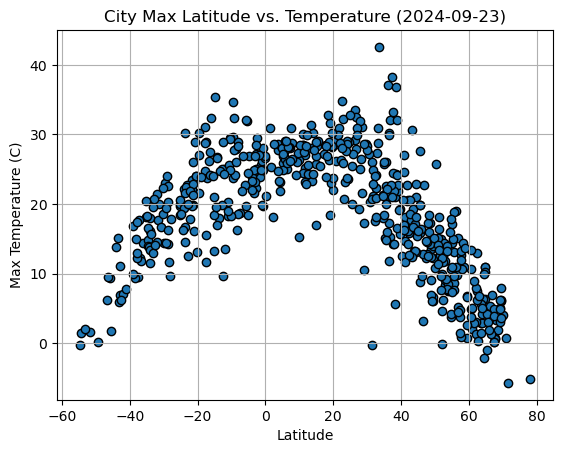

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', marker='o')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-09-23)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

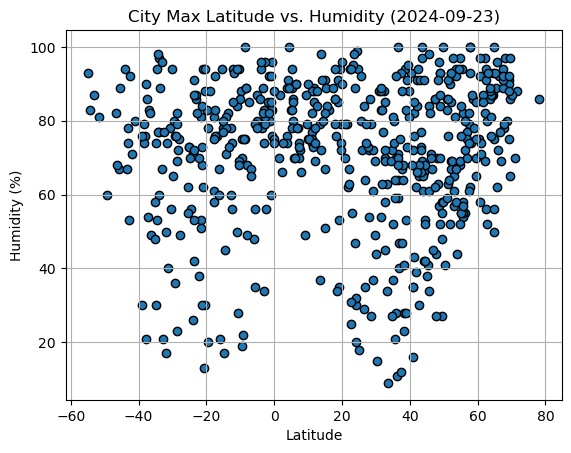

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', marker='o')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2024-09-23)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

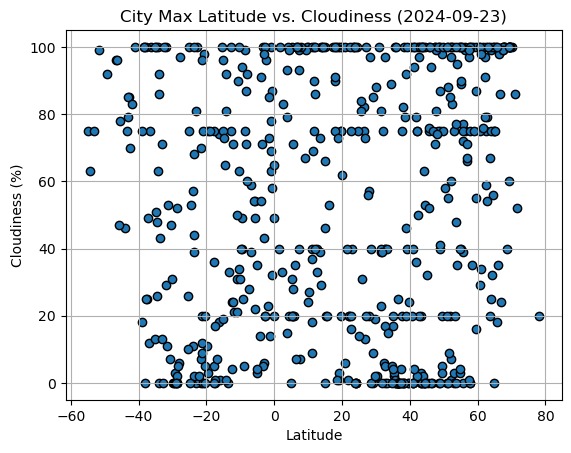

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', marker='o')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2024-09-23)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

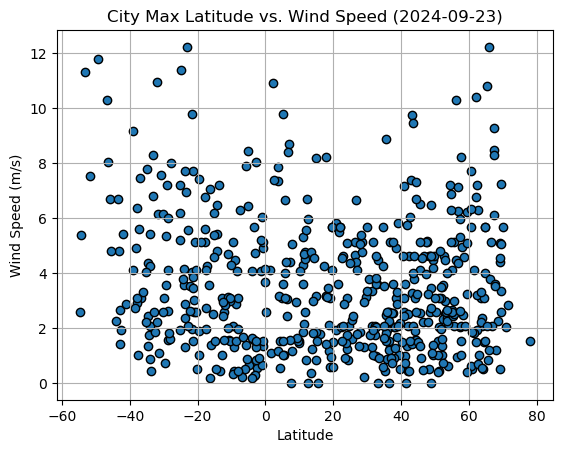

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', marker='o')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2024-09-23)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, ann_x, ann_y, x_label='X-axis', y_label='Y-axis', title='Linear Regression Plot'):
    # Perform linear regression using arguments 
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    value = 12345.6789
    np.set_printoptions(suppress=True)
    print(f'The r^2-value is: {r_value**2}')
    # Calculate predicted y values
    y_pred = slope * np.array(x) + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create the scatter plot
    plt.scatter(x, y, color='blue', edgecolor='black', label='Data Points')
    plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.annotate(line_eq,(ann_x,ann_y),fontsize=15,color="red")
    # Add titles and labels
    # title: Title of the plot (str)
    plt.title(title)
    # x_label: Label for the x-axis (str)
    plt.xlabel(x_label)
    # y_label: Label for the y-axis (str)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid()

    # Show the plot
    plt.show()


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kenai,60.5544,-151.2583,10.64,75,100,5.66,US,1727133829
3,jurm,36.8648,70.8342,15.31,40,0,1.26,AF,1727133832
4,lazaro cardenas,17.9583,-102.2000,28.50,86,90,3.16,MX,1727133833
5,tiksi,71.6872,128.8694,-5.71,88,52,2.82,RU,1727133834
6,hawaiian paradise park,19.5933,-154.9731,28.18,74,75,5.66,US,1727133835


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,12.22,83,12,7.45,SH,1727133830
2,puerto natales,-51.7236,-72.4875,1.56,81,99,7.53,CL,1727133718
7,kruisfontein,-34.0033,24.7314,18.00,60,86,0.88,ZA,1727133836
8,port-aux-francais,-49.3500,70.2167,0.19,60,92,11.79,TF,1727133837
16,west island,-12.1568,96.8225,24.99,94,71,2.57,CC,1727133583


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6684614272861138


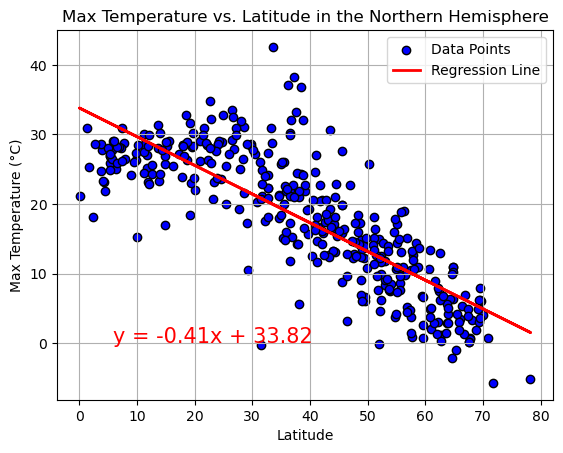

In [22]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    ann_x = 5.8, 
    ann_y = 0.1,
    x_label='Latitude',
    y_label='Max Temperature (°C)',
    title='Max Temperature vs. Latitude in the Northern Hemisphere'
)

The r^2-value is: 0.5678900297734834


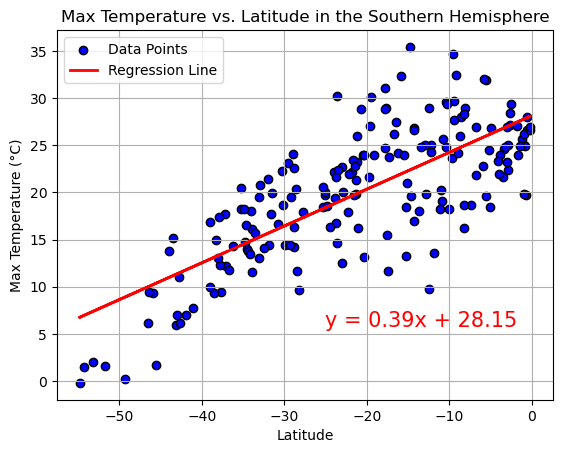

In [23]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Max Temp'],
    ann_x = -25, 
    ann_y = 5.8,
    x_label='Latitude',
    y_label='Max Temperature (°C)',
    title='Max Temperature vs. Latitude in the Southern Hemisphere'
)

**Discussion about the linear relationship:** Our analysis supports that temperature decreases as one moves away from the equator, but other factors may can cause deviations from the expected linear relationship.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0024475542723064406


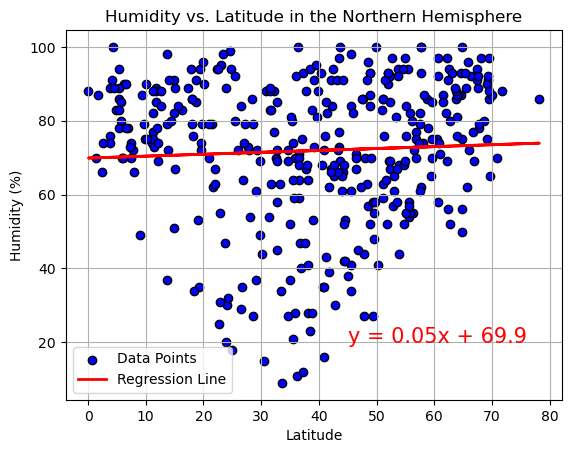

In [24]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    ann_x = 45, 
    ann_y = 20,
    x_label='Latitude',
    y_label='Humidity (%)',
    title='Humidity vs. Latitude in the Northern Hemisphere'
)

The r^2-value is: 0.005745559870898221


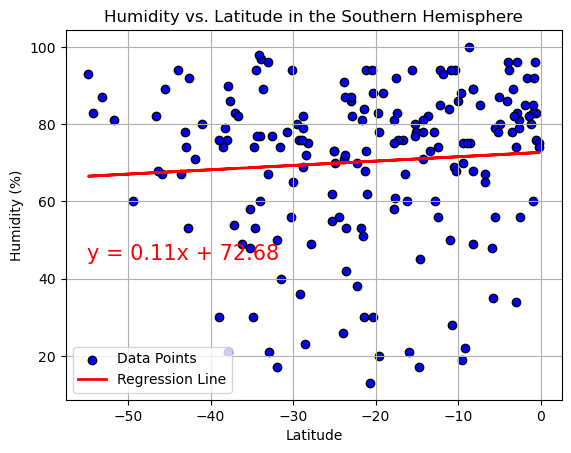

In [25]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    ann_x = -55, 
    ann_y = 45,
    x_label='Latitude',
    y_label='Humidity (%)',
    title='Humidity vs. Latitude in the Southern Hemisphere'
)

**Discussion about the linear relationship:** While latitude plays a significant role in determining temperature, its impact on humidity is far less direct and more heavily moderated by local and regional factors. This leads to a weaker linear relationship between humidity and latitude in comparison to temperature and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.02102997358590343


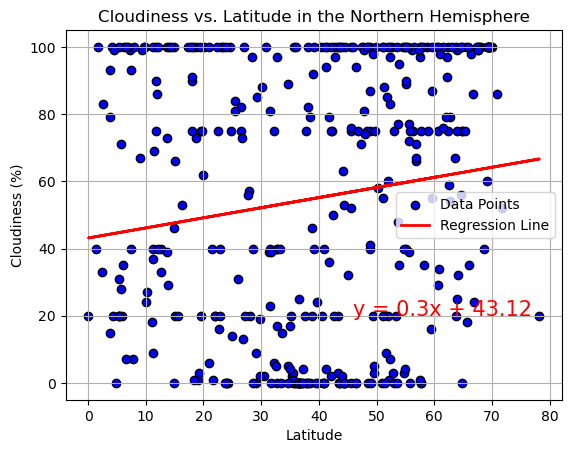

In [26]:

# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    ann_x = 46, 
    ann_y = 20,
    x_label='Latitude',
    y_label='Cloudiness (%)',
    title='Cloudiness vs. Latitude in the Northern Hemisphere'
)

The r^2-value is: 0.01001254513196431


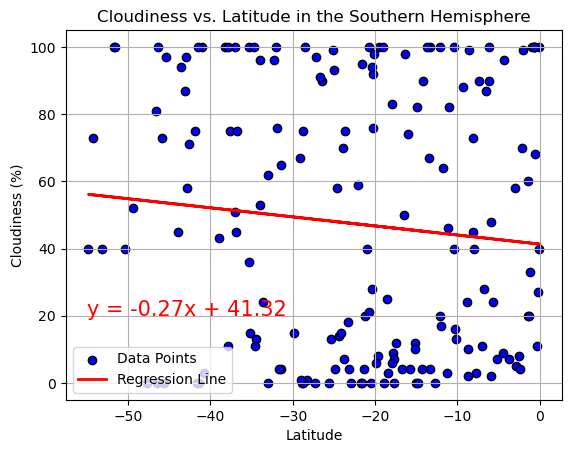

In [219]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    ann_x = -55, 
    ann_y = 20,
    x_label='Latitude',
    y_label='Cloudiness (%)',
    title='Cloudiness vs. Latitude in the Southern Hemisphere'
)

**Discussion about the linear relationship:** The linear regression analysis between cloudiness and latitude often shows little to no clear relationship. Proximity to large bodies of water or humid regions can increase cloudiness, while dry inland areas, regardless of latitude, often have less cloud cover.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0029612182109627233


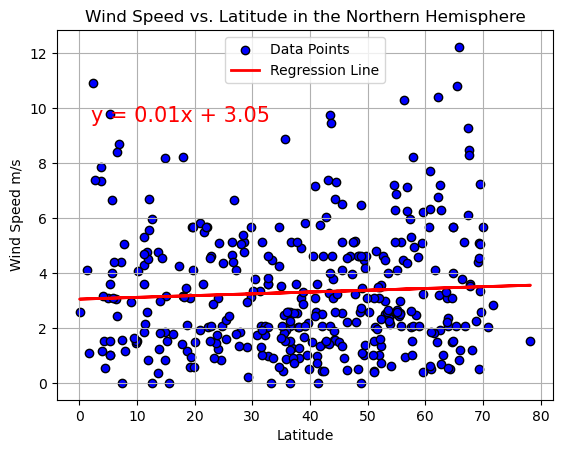

In [28]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    ann_x = 2, 
    ann_y = 9.5,
    x_label='Latitude',
    y_label='Wind Speed m/s',
    title='Wind Speed vs. Latitude in the Northern Hemisphere'
)

The r^2-value is: 0.09791259663332898


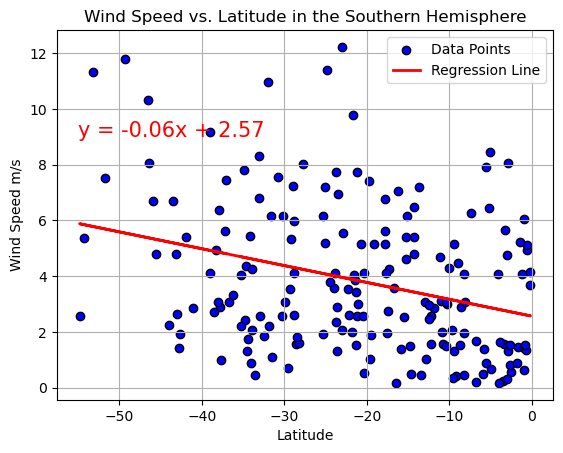

In [29]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    ann_x = -55, 
    ann_y = 9,
    x_label='Latitude',
    y_label='Wind Speed m/s',
    title='Wind Speed vs. Latitude in the Southern Hemisphere'
)

**Discussion about the linear relationship:** Global atmospheric circulation does create some regional wind patterns based on latitude, the relationship between wind speed and latitude is weak due to the strong influence of other factors. 